# Regression Model to determine influence of artist's gender on the topics generated by BERTopic

In [ ]:
from google.colab import drive
import os

# gdrive_path='/content/gdrive/MyDrive/Bertopic/shared_work/'

# # This will mount your google drive under 'MyDrive'
# drive.mount('/content/gdrive', force_remount=True)
# # In order to access the files in this notebook we have to navigate to the correct folder
# os.chdir(gdrive_path)
# dataset_path = ''
# # Check manually if all files are present
# print(sorted(os.listdir()))

# To run from the common drive:
dataset_path = '/content/drive/MyDrive/Praktikum - NLP Applications/Models/bertopic_concatenated_chunks_stratified/'
drive.mount('/content/drive', force_remount=True)

Mounted at /content/gdrive
['BERTopic.ipynb', 'BERTopic_female.ipynb', 'Data-PreProcessing.ipynb', 'Dataset_Statistics.ipynb', 'Regression.ipynb', 'Regression_RapSubset.ipynb', 'betti2023_weat_wordsets.csv', 'chunk_5.csv', 'chunk_6.csv', 'concatenated_chunks.csv', 'genius_with_artists_first_chunk.csv', 'glove.6B.100d.txt', 'glove.6B.100d.txt.word2vec', 'glove.6B.200d.txt', 'glove.6B.300d.txt', 'glove.6B.50d.txt', 'glove.6B.zip', 'model', 'model_new', 'my_model', 'mymodel', 'scweat_analysis (1).ipynb', 'topics.json', 'topics.pkl', 'topics_for_bias_analysis.csv', 'updated_artists_with_gender_lyrics.csv', 'wasabi_artist_new_dartists.csv', 'wasabi_english_songs.csv', 'wasabi_new_dartists_balanced.csv', 'wasabi_new_songs_english_balanced_artists.csv', 'weat_results.csv']


In [ ]:
import pandas as pd
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer
# from bertopic import BERTopic
# from umap import UMAP

# set path of the file
csv_file_path = 'topics_for_bias_analysis.csv'
df = pd.read_csv(dataset_path + csv_file_path)

In [ ]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,genre,artist,year,views,features,lyrics,language,gender,cleaned_lyrics,has_lyrics,topic,topic_prob,topic_label
0,0,0,0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",en,Male,"\nKilla Cam, Killa Cam, Cam\nKilla Cam, Killa ...",True,7,0.609817,mi_dem_yuh
1,1,1,1,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,en,Male,"\n\n\nUgh, Killa!\nBaby!\nKanye, this that 197...",True,0,0.675691,nigga_niggas_bitch
2,2,2,2,Family Ties,rap,Cam'ron,2004,41960,"{""Cam\\'ron"",""Lady Wray""}","[Verse 1: Cam'ron]\nKilla, Dipset\nMan I spit ...",en,Male,"\nKilla, Dipset\nMan I spit that pimp talk, yo...",True,434,0.652398,bicyclette_ma bicyclette_bicyclette ma
3,3,3,3,Rockin and Rollin,rap,Cam'ron,1998,6399,"{""Cam\\'ron""}",[Verse 1]\nAy yo you wonder who I are\nI guzzl...,en,Male,\nAy yo you wonder who I are\nI guzzle up at t...,True,434,0.742198,bicyclette_ma bicyclette_bicyclette ma
4,4,4,4,Lord You Know,rap,Cam'ron,2004,11882,"{""Cam\\'ron"",""Juelz Santana"",Jaheim}","[Chorus: Jaheim]\nNow Lord you know, just how ...",en,Male,"\nNow Lord you know, just how hard I try\nTo l...",True,398,0.737625,dog status_movin rank_status im


In [ ]:
dataset = df[['genre', 'year', 'gender', 'topic', 'topic_label', 'topic_prob']]

In [ ]:
dataset.describe()

,year,topic,topic_prob
count,537553.000000,537553.000000,537553.000000
mean,2002.695682,165.225821,0.684348
std,23.488690,156.126712,0.093572
min,1.000000,-1.000000,0.050249
25%,1996.000000,28.000000,0.630626
50%,2008.000000,110.000000,0.693565
75%,2015.000000,269.000000,0.746582
max,2023.000000,541.000000,0.995553


In [ ]:
# Converting year to decade
dataset['year'].unique()

array([2004, 1998, 2002, 2009, 2000, 2006, 2010, 2011, 2003, 2014, 2007,
       2005, 1999, 2013, 2015, 2008, 2001, 2020, 2012, 2016, 2019, 1995,
       1994, 1997, 1993, 2017, 1992, 1996, 1988, 1990, 1991, 1960, 2018,
       1989, 1965, 1975, 1962, 1974, 1964, 1963, 1976, 1966, 1967, 1985,
       1979, 1986, 1961, 1981, 1980, 1978, 1969, 1970, 1971, 1968, 1973,
       1983, 1987, 1972, 1977, 1982, 2022, 1984, 2021, 1956,    1, 1950,
       1953, 1951, 1949, 1958, 1955, 1957, 1946, 1959, 1954, 1952, 1945,
       1948, 1947, 1939, 1871, 1876, 1865, 1415, 2023, 1770, 1944, 1855,
       1936,   15, 1814, 1759, 1785, 1788, 1789, 1791, 1782, 1929, 1938,
       1926, 1931, 1776, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808,
       1940, 1941, 1932, 1933, 1943, 1942,    2,  699, 1861, 1937, 1935,
       1934, 1862, 1918, 1919, 1917, 1930, 1517, 1790, 1787, 1928, 1927,
       1895, 1907, 1911, 1925, 1906, 1904, 1923,   79, 1864, 1847, 1921,
       1741, 1920, 1905, 1870, 1924, 1922, 1739, 17

In [ ]:
dataset['year'].max()

2023

In [ ]:
# Number of songs with year < 1950 - a few of these are from the 18th and 19th centuries but there are also some mistagged songs

print(len(dataset[dataset['year'] < 1950])) # => 2856, only 0.5% of the data so these are ignored
dataset = dataset[dataset['year'] >= 1950]

def get_decade(year):
  if year >= 2000 and year < 2010:
    decade = '2000s'
  else:
    decade = str(year//100) + str(year%100)[0] + '0s'
  return decade

dataset['decade'] = dataset['year'].apply(get_decade)

2856


In [ ]:
# Number of outliers

len(df[df['topic'] == -1])

8598

In [ ]:
dataset = dataset[dataset['topic'] != -1]
dataset = dataset[dataset['genre'] != 'misc']
top10topics = dataset['topic'].value_counts().nlargest(10).to_dict()
dataset['decade'] = dataset['year'].apply(get_decade)
mask = dataset['topic'].isin(top10topics)
top10 = dataset[mask]
top10_X = top10[['genre', 'decade', 'gender']]
top10_y = top10['topic']

In [ ]:
top10

,genre,year,gender,topic,topic_label,topic_prob,decade
1,rap,2004,Male,0,nigga_niggas_bitch,0.675691,2000s
5,rap,2002,Male,0,nigga_niggas_bitch,0.776709,2000s
6,rap,2004,Male,0,nigga_niggas_bitch,0.778837,2000s
7,rap,2004,Male,0,nigga_niggas_bitch,0.740868,2000s
11,rap,2006,Male,0,nigga_niggas_bitch,0.706905,2000s
...,...,...,...,...,...,...,...
537546,pop,2020,Male,1,jesus_praise_lord,0.795815,2020s
537547,pop,2020,Male,1,jesus_praise_lord,0.770242,2020s
537548,pop,2020,Male,1,jesus_praise_lord,0.745915,2020s
537549,pop,2022,Female,3,dance_funky_dance dance,0.539879,2020s


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(top10_X, top10_y, test_size=0.2, random_state=42)

In [ ]:
len(top10_y.unique())

10

The feature importances you've obtained from the RandomForestClassifier can give you insight into which features your model finds most important when making predictions. The values are a measure of the (normalized) total reduction of the criterion brought by that feature, also known as "Gini importance". if dont wan to use random forest then dont run the model here

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# # le = LabelEncoder()
# cat = OneHotEncoder()
# # cat_dec = OneHotEncoder()
# preprocessor = ColumnTransformer(transformers=[
#     ('cat', cat, ['genre', 'decade', 'gender'])
# ])


# # Create the Random Forest model pipeline
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# # Define the parameter grid for RandomForestClassifier
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [None, 10, 20, 30],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4],
# }

# # Create the Grid Search model
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Evaluate the best model
# y_pred = best_model.predict(X_test)
# print("Accuracy of the best model:", accuracy_score(y_test, y_pred))

# # Get feature importances from the best model
# best_feature_importances = best_model.named_steps['classifier'].feature_importances_
# print("Best Model Feature Importances:", best_feature_importances)

In [ ]:
# # Get the feature names after one-hot encoding from the fitted pipeline
# feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

# # Create a dictionary mapping feature names to their importances
# feature_importance_dict = dict(zip(feature_names, best_feature_importances))

# # Print the dictionary sorted by importance
# for feature, importance in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True):
#     print(f"{feature}: {importance}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(top10_X, top10_y, test_size=0.2, random_state=42)

# le = LabelEncoder()
cat = OneHotEncoder()
# cat_dec = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat, ['genre', 'decade', 'gender'])
])
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='saga',penalty= 'l1', max_iter=1000)

In [ ]:
# note: running the grid search here is optional cuz after gridsearch the accuracy did not improve that much

#from sklearn.model_selection import GridSearchCV

# # Define a set of parameters for tuning
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l1', 'l2'],  # Type of penalty
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Optimization algorithms
# }
# # Create the Logistic Regression model
# model = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')

# # Create GridSearchCV with the model and parameter grid
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # The best hyperparameters from GridSearchCV
# print("Best Parameters: ", grid_search.best_params_)

# # Use the best model
# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)
# # Make predictions with the best model
# y_hat = best_model.predict(X_test)
# accuracy_score(y_hat, y_test)

In [ ]:
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_hat, y_test)

0.4733125223888235

In [ ]:
import numpy as np

# Retrieve the model's coefficients for all classes
coefficients = model.coef_

# Calculate the average of the absolute values of the coefficients for each feature across all classes
mean_coefficients = np.mean(np.abs(coefficients), axis=0)

# Get feature names after OneHotEncoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['genre', 'decade', 'gender'])

# Match averaged coefficients with feature names
feature_importance_dict = dict(zip(feature_names, mean_coefficients))

# Print sorted by absolute importance
sorted_importances = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")

# note: this code gives the importance of each feature, regardless of each class

genre_rap: 1.5697239816652908
decade_1950s: 0.5671335483329712
genre_country: 0.5525887904760741
decade_1960s: 0.4988995070075604
gender_Female: 0.46662203205919717
genre_rb: 0.4456976450456459
decade_1970s: 0.33472229209671045
genre_rock: 0.26079039907599133
decade_2020s: 0.2565169968278861
decade_2000s: 0.24665732332163798
decade_1980s: 0.24272239704836962
decade_2010s: 0.22599318927149709
decade_1990s: 0.18100727888032145
genre_pop: 0.050522779090824275
gender_Male: 0.042620397234684804


In [ ]:
# Retrieve the model's coefficients for all classes
coefficients = model.coef_

# Get feature names after OneHotEncoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['genre', 'decade', 'gender'])

# Extract unique class names (topics) from y_train
class_names = y_train.unique()
class_names.sort()  # Sorting to ensure the order matches the class indices

# Step 1: Create the mapping dictionary
topic_to_label = dict(zip(df['topic'], df['topic_label']))
# Removing duplicates
topic_to_label = {k: v for k, v in topic_to_label.items() if pd.notnull(k)}


# Ensure the number of class names matches the number of classes in the model
assert len(class_names) == coefficients.shape[0], "Number of class names does not match number of classes"

for class_index in range(len(class_names)):
    # Get the coefficients for this class
    class_coefficients = coefficients[class_index]

    # Match coefficients with feature names for this class
    feature_importance_dict = dict(zip(feature_names, class_coefficients))

    # Get the topic label for the current class index
    topic_label = topic_to_label.get(class_names[class_index])

    # Print sorted by absolute importance
    sorted_importances = sorted(feature_importance_dict.items(), key=lambda item: abs(item[1]), reverse=True)

    print(f"Feature Importances for Topic '{class_names[class_index]}', '{topic_label}':")
    for feature, importance in sorted_importances:
        print(f"{feature}: {importance}")
    print("\n")

Feature Importances for Topic '0', 'nigga_niggas_bitch':
genre_rap: 3.6763016507934134
genre_country: -1.6597668810112114
decade_1960s: -1.507352115061098
gender_Female: -1.4564585699397492
decade_1970s: -1.3367569934033652
genre_rock: -1.2296929026413355
decade_1950s: -1.1580286652251863
decade_2010s: 0.8134326279302375
decade_1980s: -0.6335977558784136
decade_2000s: 0.5421094752622815
decade_1990s: 0.49338915797060384
genre_pop: 0.053573990016641856
gender_Male: 0.026096581671925013
decade_2020s: 0.005372591435205306
genre_rb: 0.0


Feature Importances for Topic '1', 'jesus_praise_lord':
genre_rap: -1.8612325819175246
genre_rb: -0.6257364907930917
decade_2020s: -0.43156782444666814
genre_country: 0.39422652995507207
decade_2010s: -0.34654180697789977
decade_1950s: 0.28299442392217417
decade_1990s: 0.2110069822431145
decade_2000s: -0.14975564759072435
decade_1980s: 0.11483001752615071
genre_pop: 0.10076563807430576
gender_Male: 0.09628440274110267
genre_rock: 0.0
decade_1960s: 0.0
dec

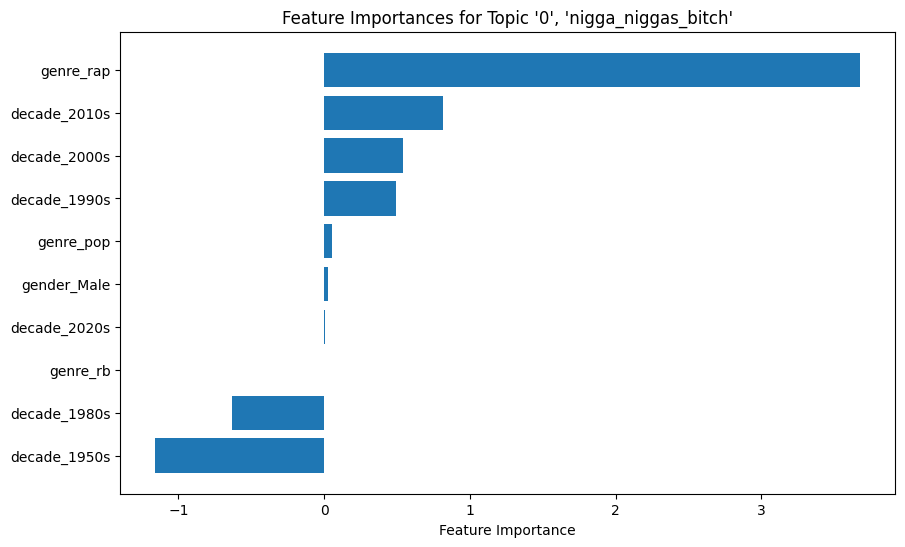

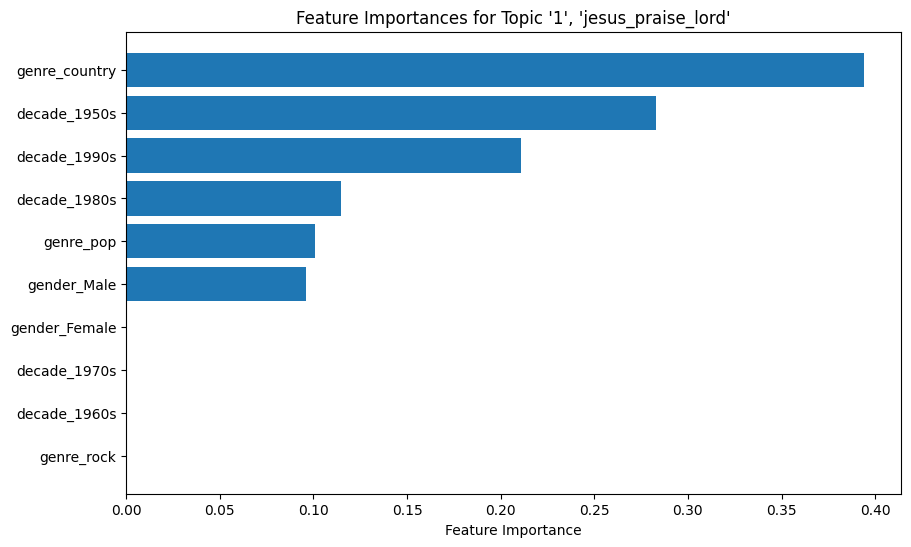

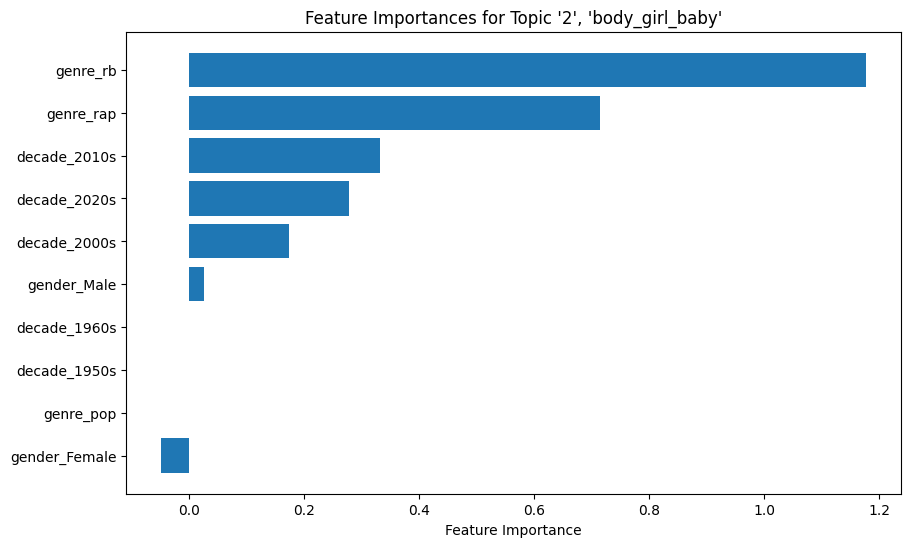

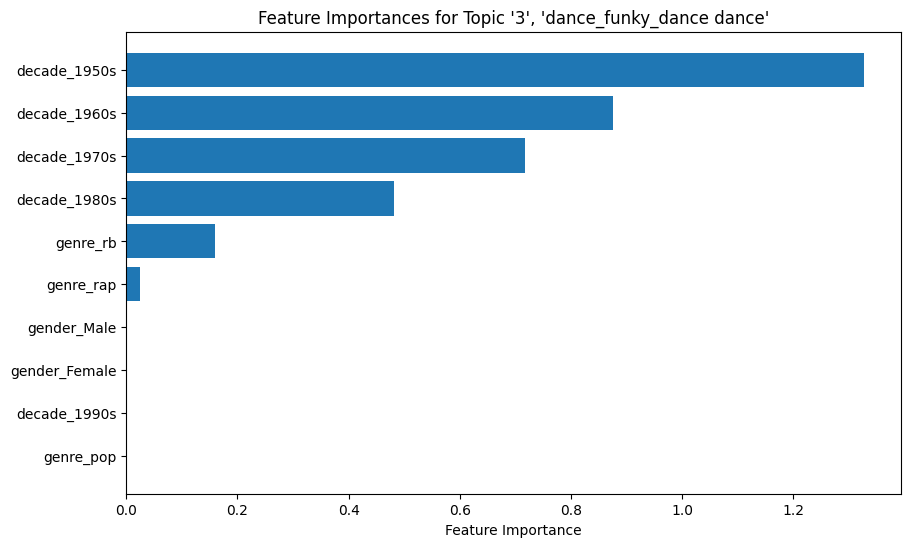

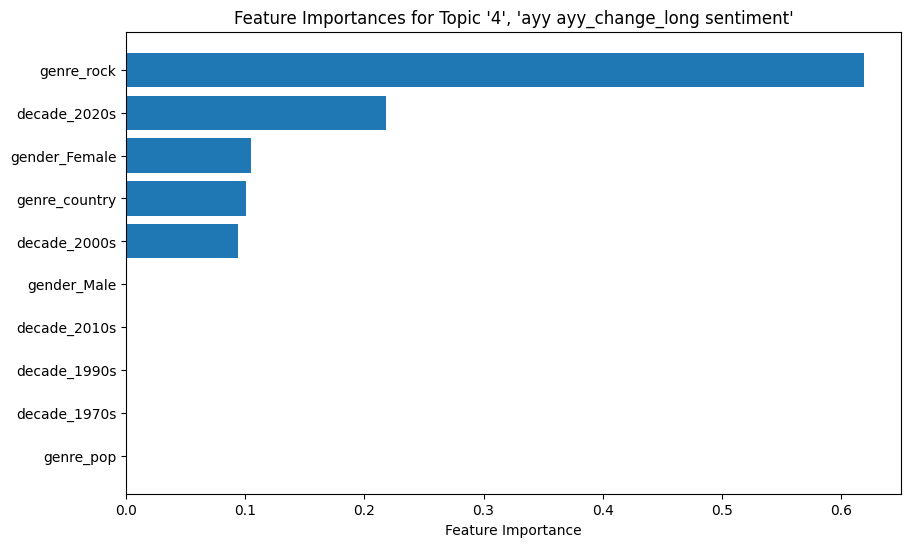

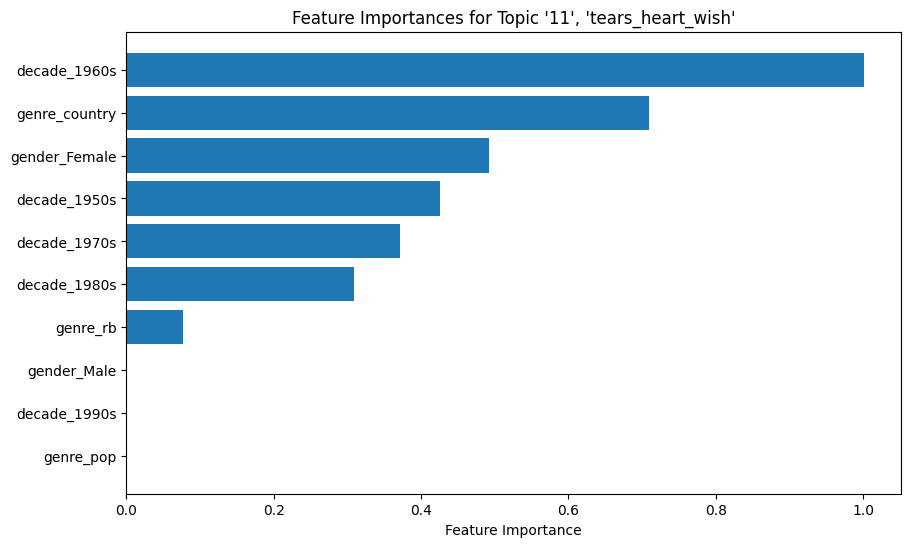

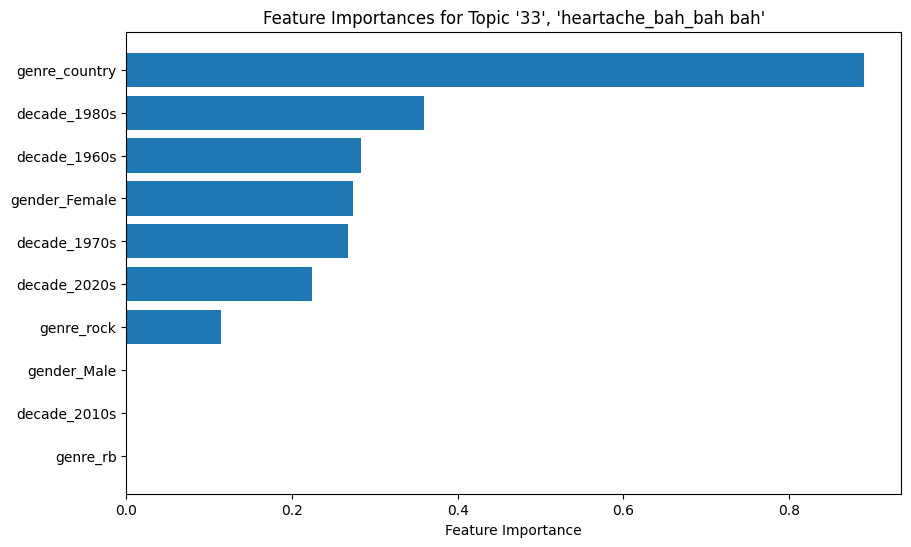

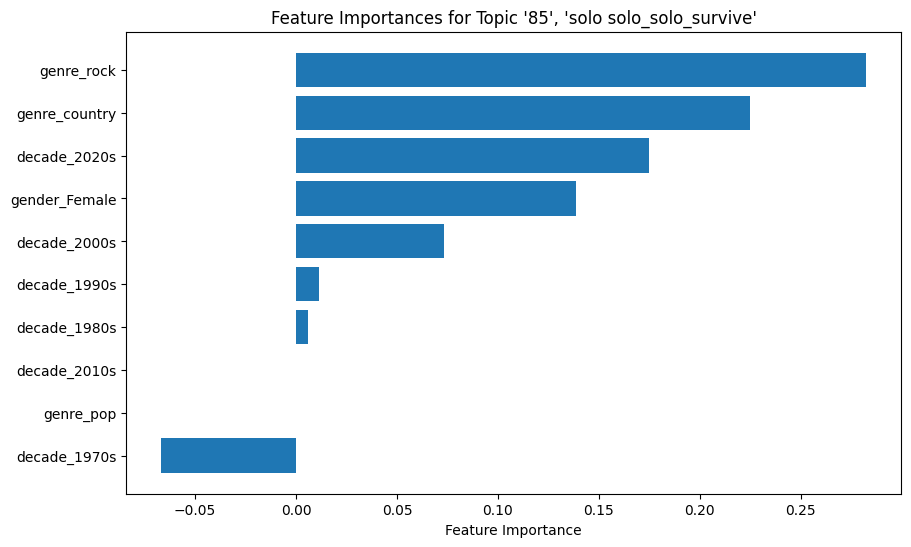

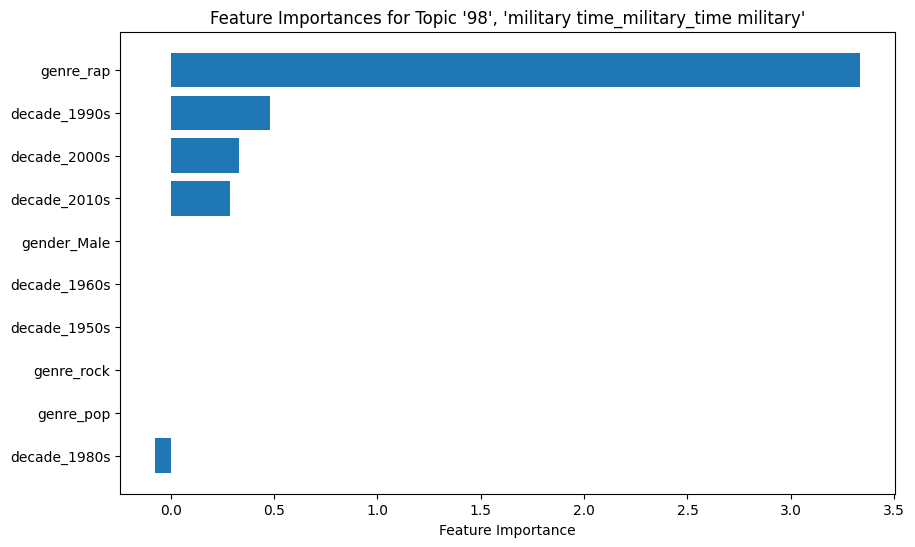

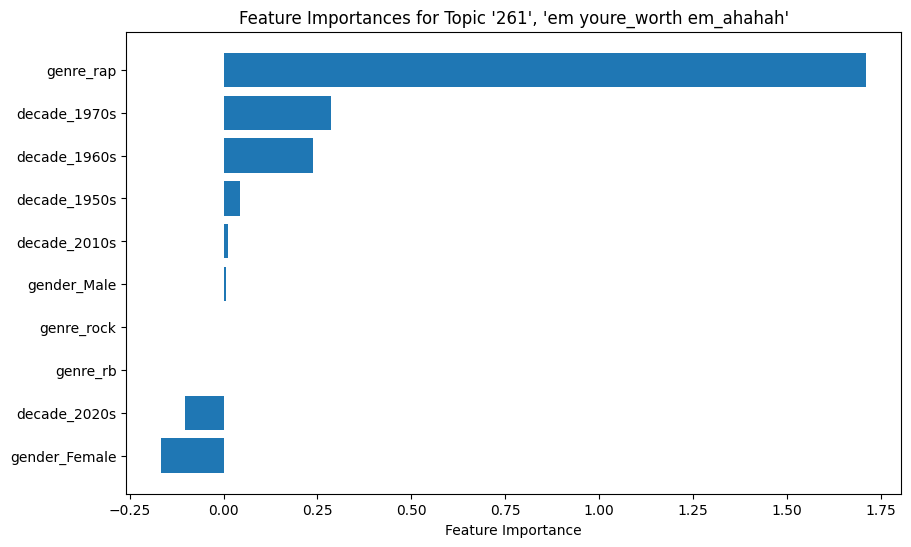

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already retrieved the feature importances and class names

# Function to create a bar chart for feature importances
def plot_feature_importances(importances, names, title, top_n=10):
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Get the top 'top_n' feature names and importances
    top_feature_names = [names[i] for i in indices[:top_n]]
    top_importances = [importances[i] for i in indices[:top_n]]

    # Create a horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), top_importances, align='center')
    plt.yticks(range(top_n), top_feature_names)
    plt.xlabel('Feature Importance')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
    plt.show()

# Loop through each class (topic) and plot feature importances
for class_index in range(len(class_names)):
    class_coefficients = coefficients[class_index]
    feature_importance_dict = dict(zip(feature_names, class_coefficients))
    topic_label = topic_to_label.get(class_names[class_index])

    # Set top_n to the number of features or a smaller value if desired
    top_n = min(10, len(feature_importance_dict))

    plot_feature_importances(
        importances=list(class_coefficients),  # Use the coefficients directly
        names=feature_names,
        title=f"Feature Importances for Topic '{class_names[class_index]}', '{topic_label}'",
        top_n=top_n
    )




### Topic Analysis:

1. **Topic '0', 'nigga_niggas_bitch'**:
   - **Strong Positive Influence**: Predominantly associated with the genre 'rap'.
   - **Negative Influence in Early Decades**: Lesser association with earlier decades (1950s-1970s) and 'rock' and 'country' genres, indicating a specific thematic focus in later years and specific genres.
   - **Positive in 2000s and 2010s**: Aligns with increased topic occurrence in these decades.

2. **Topic '1', 'jesus_praise_lord'**:
   - **Negative Association with Rap and R&B**: Suggests this topic is less prevalent in these genres.
   - **Positive Association with Country**: Indicates a stronger presence in this genre.
   - **Varied Decade Influence**: Mixed influence across different decades.

3. **Topic '2', 'body_girl_baby'**:
   - **Strong Association with R&B and Rap**: Indicates relevance in these genres.
   - **Negative Association with Rock and Country**: Less prevalent in these genres.
   - **Recent Decades Influence**: More common in the 2010s and 2020s.

4. **Topic '3', 'dance_funky_dance dance'**:
   - **Strong Early Decades Influence**: Particularly prevalent in the 1950s-1970s.
   - **Negative Association with Country**: Less common in this genre.
   - **Mixed Influence in Recent Decades**: Less common in the 2000s and 2010s.

5. **Topic '4', 'ayy ayy_change_long sentiment'**:
   - **Negative Association with 1950s and 1960s**: Suggests lesser relevance in these decades.
   - **Positive Association with Rock**: More common in this genre.
   - **Mixed Gender Influence**: Slight positive influence for females.

6. **Topic '11', 'tears_heart_wish'**:
   - **Strong Negative Association with Rap**: Indicates this topic is less common in rap.
   - **Positive Association with 1960s and Country**: More prevalent in this decade and genre.
   - **Negative Recent Decades Influence**: Less common in the 2000s and 2010s.

7. **Topic '33', 'heartache_bah_bah bah'**:
   - **Negative Association with Rap**: Less prevalent in rap.
   - **Positive Association with Country**: Indicates relevance in this genre.
   - **Mixed Decade Influence**: Varied influence across different decades.

8. **Topic '85', 'solo solo_solo_survive'**:
   - **Negative Association with Early Decades**: Less common in the 1950s and 1960s.
   - **Positive Association with Rock**: More prevalent in this genre.
   - **Mixed Influence Across Decades and Genders**.

9. **Topic '98', 'military time_military_time military'**:
   - **Strong Positive Association with Rap**: Indicates a high prevalence in this genre.
   - **Negative Association with Female and Other Genres**: Less common among female entries and in genres other than rap.
   - **Varied Decade Influence**: Different levels of association across decades.

10. **Topic '261', 'em youre_worth em_ahahah'**:
    - **Positive Association with Rap**: More prevalent in this genre.
    - **Negative Association with Recent Decades**: Particularly less common in the 1990s and 2000s.
    - **Mixed Influence Across Genres and Decades**.



In [ ]:
parameters = model.get_params()
parameters

In [ ]:
coefficients = model.coef_
coefficients

In [ ]:
#extracting the feature weight for gender varaible

model.fit(X_train, y_train)

# Get the feature names after OneHotEncoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Find the column indices for the 'gender' feature
gender_feature_indices = [i for i, feature in enumerate(feature_names) if 'gender' in feature]

# Extract the coefficients for the 'gender' feature from the model
gender_coefficients = model.coef_[:, gender_feature_indices]

# Print the gender coefficients
print(gender_coefficients)


Improvement on regression model: hyper parameter tuning


In [ ]:
# Print the number of unique classes
print("Number of unique classes:", len(top10_y.unique()))

# Print the count of instances in each class
print("Count of instances in each class:\n", top10_y.value_counts())


In [ ]:
# # Extracting the coefficients
# coefficients = best_model.coef_
# coefficients

# # Mapping coefficients to feature names
# coef_dict = dict(zip(feature_names, coefficients))

# # Extract and analyze coefficients related to 'gender'
# gender_coefs = {k: v for k, v in coef_dict.items() if 'gender' in k}
# print(gender_coefs)

# # Further steps would be to evaluate the model and interpret these coefficients.